In [40]:
import pandas as pd
import soundscapy as sspy

In [41]:
df_ground_truth = pd.read_csv('df_reordered.csv')
df_ground_truth = df_ground_truth.iloc[:, :10]
df_ground_truth['LocationID_ground_truth'] = df_ground_truth['LocationID'] + '_ground_truth'

In [42]:
df = pd.read_csv('df_reordered.csv')
df.iloc[:, :9].to_csv('df_ground_truth.csv', index=False)
df

,pleasant,eventful,chaotic,vibrant,uneventful,calm,annoying,monotonous,GroupID,LocationID,...,THD_THD_Max,THD_Min_Max,THD_Max_Max,THD_L5_Max,THD_L10_Max,THD_L50_Max,THD_L90_Max,THD_L95_Max,ISOPleasant,ISOEventful
0,5.000000,3.500000,1.500000,4.5,3.500000,4.500000,1.000000,2.5,2CV11,CarloV,...,-0.92,-16.16,61.79,29.35,23.91,0.48,-13.69,-14.38,0.780330,-0.176777
1,2.000000,3.000000,2.500000,4.0,2.500000,1.500000,3.000000,3.0,2CV12,CarloV,...,-0.09,-11.76,54.18,34.82,26.53,5.57,-9.00,-10.29,0.219670,-0.133883
2,5.000000,3.000000,1.333333,3.0,3.000000,4.000000,2.000000,2.0,2CV13,CarloV,...,-2.10,-19.32,72.52,32.33,24.52,0.25,-16.30,-17.33,0.676777,-0.073223
3,4.000000,4.000000,4.000000,4.0,1.000000,2.000000,2.000000,1.0,2CV14,CarloV,...,-0.89,-17.02,55.82,26.73,19.56,1.15,-13.15,-14.52,0.280330,0.676777
4,4.000000,2.500000,1.500000,2.5,2.000000,4.500000,1.500000,2.0,2CV15,CarloV,...,-0.48,-13.68,58.08,33.22,26.86,5.59,-9.88,-11.04,0.646447,0.207107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,3.000000,3.000000,4.000000,3.0,3.000000,3.000000,4.000000,3.0,TS422,TorringtonSq,...,-1.93,-12.09,56.61,37.47,31.31,7.91,-9.82,-10.74,-0.176777,0.073223
808,3.333333,3.333333,3.666667,4.0,2.333333,2.333333,3.333333,2.0,TS423,TorringtonSq,...,-1.06,-1.40,58.63,42.41,33.92,19.06,3.54,1.84,-0.103553,0.396447
809,4.000000,4.000000,5.000000,5.0,1.000000,4.000000,3.000000,1.0,TS424,TorringtonSq,...,-0.58,-4.86,54.12,42.47,33.38,16.17,-1.25,-2.21,0.323223,0.676777
810,2.000000,3.000000,3.000000,4.0,3.000000,2.000000,3.000000,4.0,TS425,TorringtonSq,...,-1.17,-4.12,58.20,42.15,33.57,19.89,2.25,0.42,-0.176777,0.073223


In [43]:
# Assuming `df` is your DataFrame
df = df_ground_truth.copy()
df['Prefix'] = df['GroupID'].str.extract(r'^([A-Za-z]+)')  # Extract the letter prefix from GroupID

# Drop duplicates to ensure one-to-one mapping
prefix_location_dict = df[['Prefix', 'LocationID']].drop_duplicates().set_index('Prefix')['LocationID'].to_dict()

print(prefix_location_dict.values())


dict_values(['CarloV', 'SanMarco', 'CampoPrincipe', 'CamdenTown', 'CarloV', 'EustonTap', 'MiradorSanNicolas', 'MarchmontGarden', 'MonumentoGaribaldi', 'SanMarco', 'Noorderplantsoen', 'PancrasLock', 'RegentsParkFields', 'RegentsParkJapan', 'RussellSq', 'StPaulsCross', 'SanMarco', 'StPaulsRow', 'TateModern', 'TorringtonSq'])


In [44]:
df_soundaqnet_case_study = pd.read_csv('soundaqnet_case_study_results.csv')
df_soundaqnet_case_study['LocationID'] = df['Prefix'].map(prefix_location_dict)

df_soundaqnet_case_study['LocationID_soundaqnet'] = df_soundaqnet_case_study['LocationID'] + '_soundaqnet'

In [57]:
import numpy as np

# Get the max values of each column (numeric only)
max_values = df_soundaqnet_case_study.select_dtypes(include=np.number).min()

max_values

pleasant      1.497469
eventful      1.792708
chaotic       1.474651
vibrant       1.802037
uneventful    1.467134
calm          1.359627
annoying      1.729316
monotonous    2.207948
dtype: float64

In [6]:
df_dense_hop_combined = pd.read_csv('dense_hop_combined_case_study_results.csv')
df_dense_hop_combined['LocationID'] = df['Prefix'].map(prefix_location_dict)
df_dense_hop_combined['LocationID_dense_hop'] = df_dense_hop_combined['LocationID'] + '_dense_hop'

In [56]:
df_dense_hop_combined.min()

GroupID                                2CV11
pleasant                            1.579399
eventful                            1.890395
chaotic                             1.364435
vibrant                             2.114932
uneventful                          1.686181
calm                                1.307475
annoying                            1.538909
monotonous                          1.734809
LocationID                        CamdenTown
LocationID_dense_hop    CamdenTown_dense_hop
dtype: object

In [55]:
df_dense_hop_combined.tail()

,GroupID,pleasant,eventful,chaotic,vibrant,uneventful,calm,annoying,monotonous,LocationID,LocationID_dense_hop
807,TS422,1.919611,3.149833,3.220517,2.791056,1.970184,1.507240,3.246653,2.190523,TorringtonSq,TorringtonSq_dense_hop
808,TS423,1.834696,3.239792,3.426715,2.805735,2.040098,1.426565,3.510765,2.300855,TorringtonSq,TorringtonSq_dense_hop
809,TS424,1.737917,3.022920,3.279279,2.613046,2.041409,1.382587,3.404006,2.294056,TorringtonSq,TorringtonSq_dense_hop
810,TS425,1.750532,3.072091,3.358772,2.641848,2.107505,1.398704,3.502906,2.372502,TorringtonSq,TorringtonSq_dense_hop
811,TS426,1.753472,3.326858,3.693237,2.799795,2.223458,1.379291,3.889346,2.529789,TorringtonSq,TorringtonSq_dense_hop


In [7]:
df_soundaqnet_case_study.LocationID.value_counts().head()

LocationID
RussellSq            83
TateModern           82
MarchmontGarden      66
TorringtonSq         64
RegentsParkFields    61
Name: count, dtype: int64

In [8]:
df_ground_truth.LocationID.value_counts().head()

LocationID
RussellSq            83
TateModern           82
MarchmontGarden      66
TorringtonSq         64
RegentsParkFields    61
Name: count, dtype: int64

In [9]:
df_dense_hop_combined.LocationID.value_counts().head()

LocationID
RussellSq            83
TateModern           82
MarchmontGarden      66
TorringtonSq         64
RegentsParkFields    61
Name: count, dtype: int64

In [10]:
conc_df = pd.concat([df_ground_truth, df_soundaqnet_case_study, df_dense_hop_combined], ignore_index=True)
conc_df

,pleasant,eventful,chaotic,vibrant,uneventful,calm,annoying,monotonous,GroupID,LocationID,LocationID_ground_truth,LocationID_soundaqnet,LocationID_dense_hop
0,5.000000,3.500000,1.500000,4.500000,3.500000,4.500000,1.000000,2.500000,2CV11,CarloV,CarloV_ground_truth,NaN,NaN
1,2.000000,3.000000,2.500000,4.000000,2.500000,1.500000,3.000000,3.000000,2CV12,CarloV,CarloV_ground_truth,NaN,NaN
2,5.000000,3.000000,1.333333,3.000000,3.000000,4.000000,2.000000,2.000000,2CV13,CarloV,CarloV_ground_truth,NaN,NaN
3,4.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,1.000000,2CV14,CarloV,CarloV_ground_truth,NaN,NaN
4,4.000000,2.500000,1.500000,2.500000,2.000000,4.500000,1.500000,2.000000,2CV15,CarloV,CarloV_ground_truth,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431,1.919611,3.149833,3.220517,2.791056,1.970184,1.507240,3.246653,2.190523,TS422,TorringtonSq,NaN,NaN,TorringtonSq_dense_hop
2432,1.834696,3.239792,3.426715,2.805735,2.040098,1.426565,3.510765,2.300855,TS423,TorringtonSq,NaN,NaN,TorringtonSq_dense_hop
2433,1.737917,3.022920,3.279279,2.613046,2.041409,1.382587,3.404006,2.294056,TS424,TorringtonSq,NaN,NaN,TorringtonSq_dense_hop
2434,1.750532,3.072091,3.358772,2.641848,2.107505,1.398704,3.502906,2.372502,TS425,TorringtonSq,NaN,NaN,TorringtonSq_dense_hop


In [11]:
conc_df['LocationID_new'] = conc_df['LocationID_ground_truth'].combine_first(conc_df['LocationID_soundaqnet'])

conc_df['LocationID_new'] = conc_df['LocationID_new'].combine_first(conc_df['LocationID_dense_hop'])

conc_df = sspy.surveys.rename_paqs(conc_df)
conc_df = sspy.surveys.add_iso_coords(conc_df)


In [12]:
conc_df.drop(columns=['LocationID', 'LocationID_ground_truth', 'LocationID_soundaqnet', 'LocationID_dense_hop'], inplace=True)

In [13]:
conc_df.rename(columns={'LocationID_new': 'LocationID'}, inplace=True)

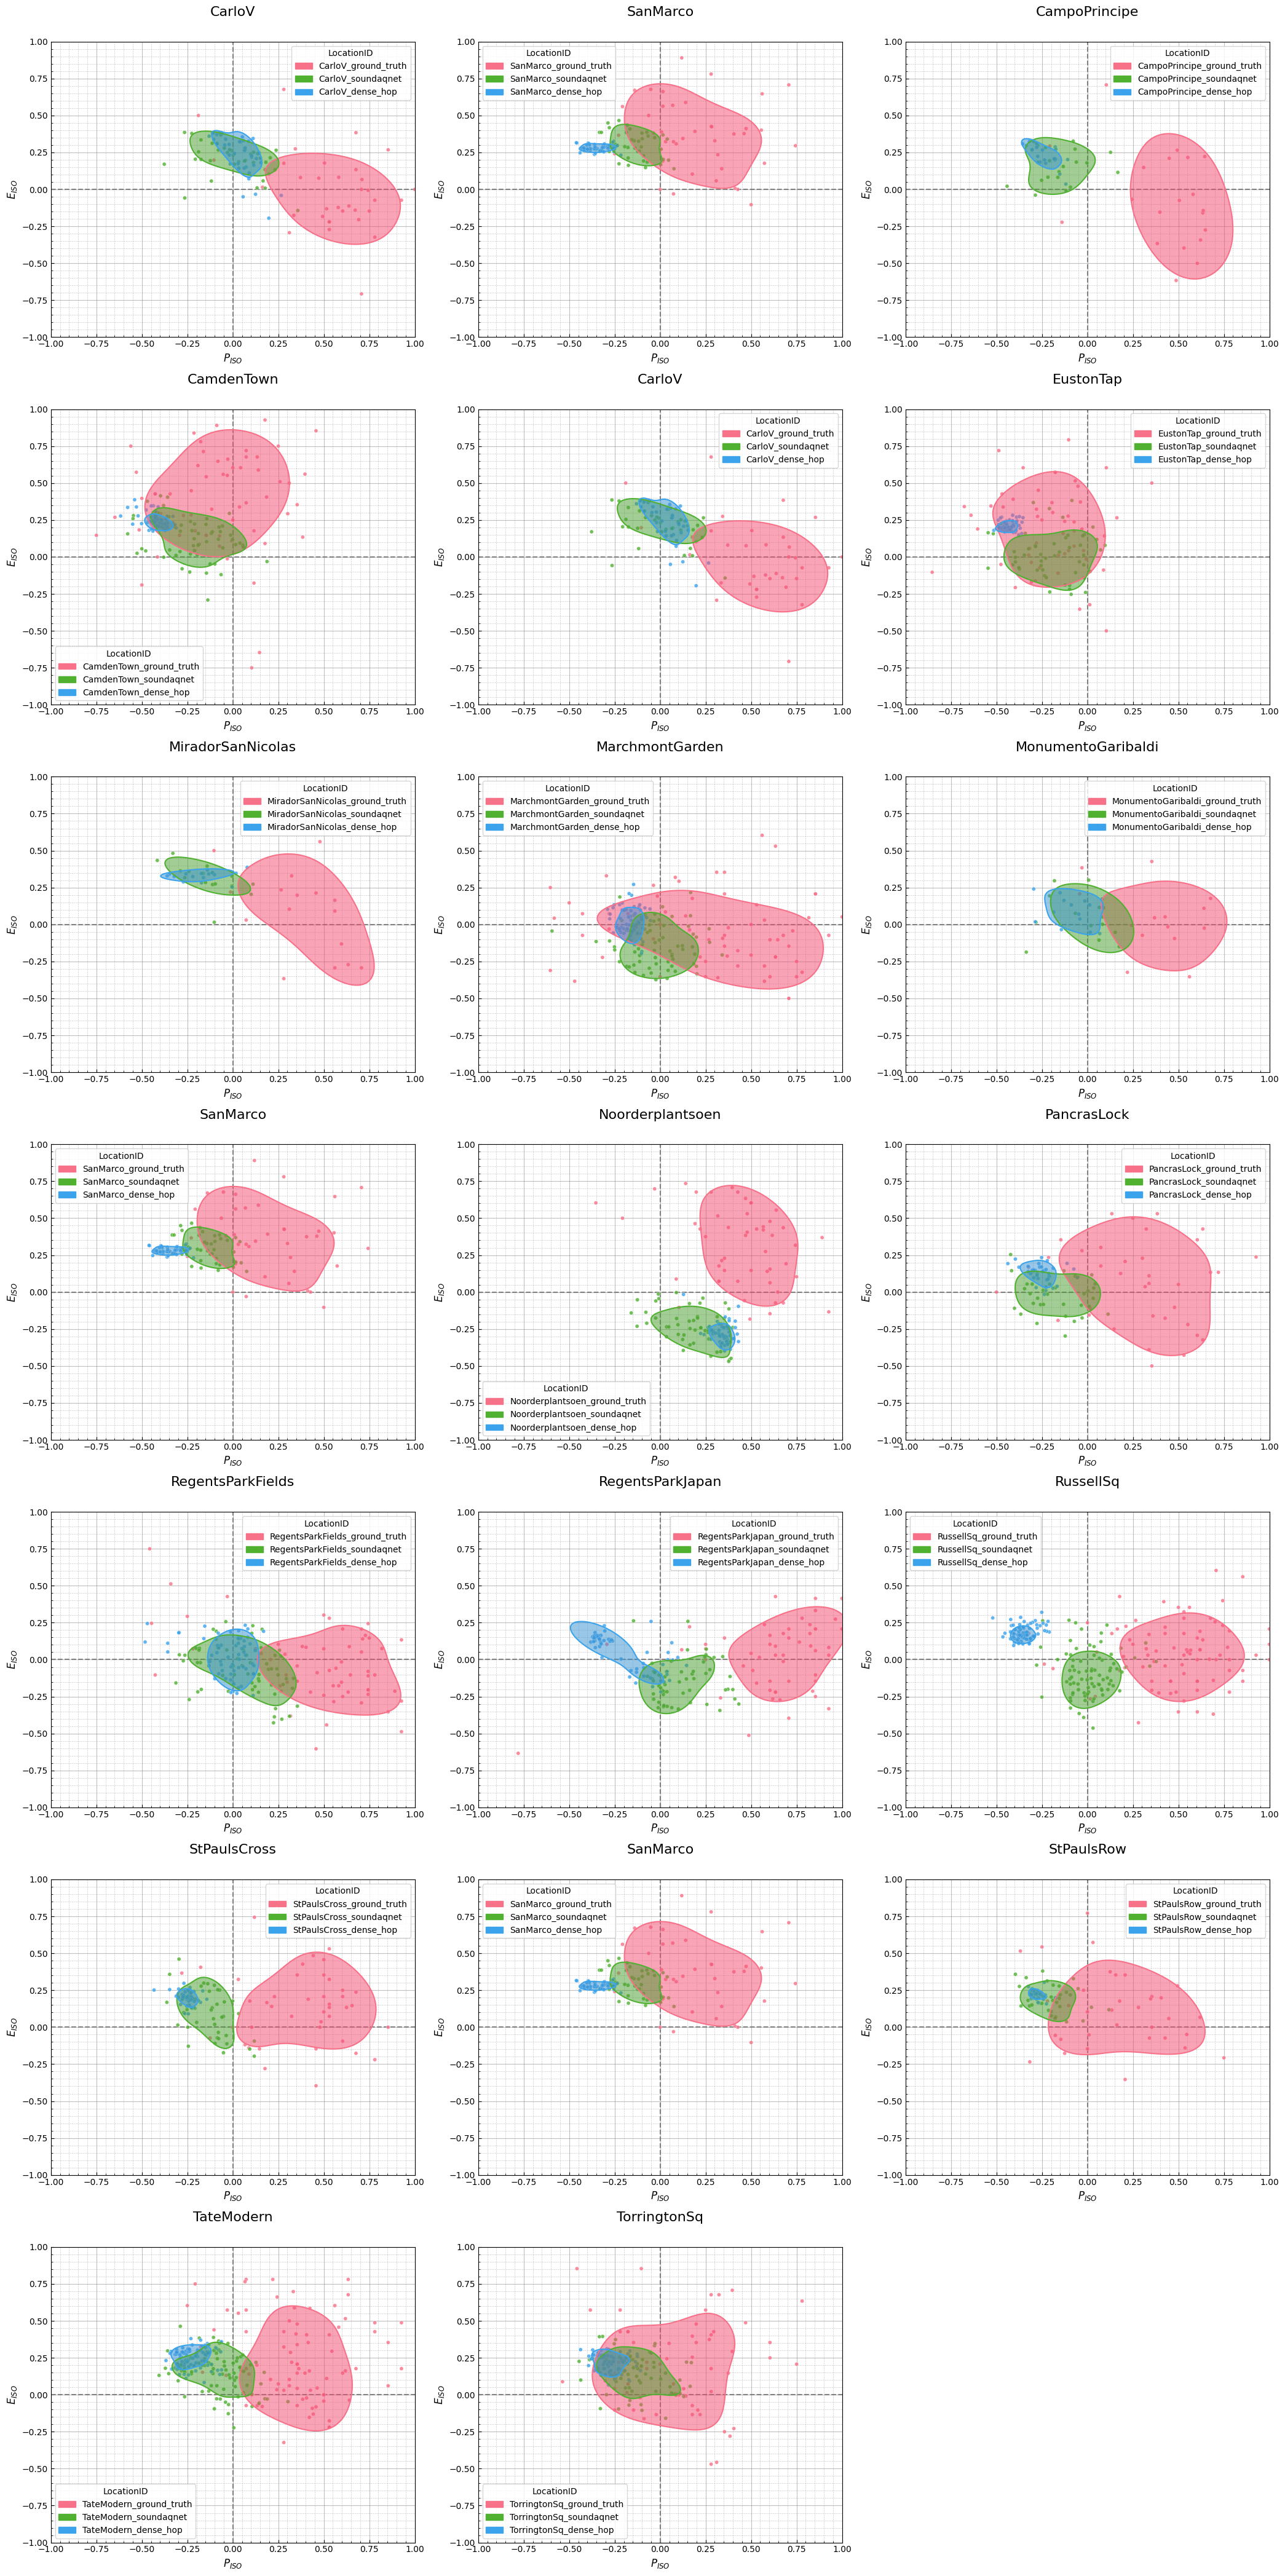

In [16]:
import soundscapy as sspy
import matplotlib.pyplot as plt
import math

# Get number of locations
n_locations = len(prefix_location_dict)
n_cols = 3  # You can adjust this for layout preference
n_rows = math.ceil(n_locations / n_cols)

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 6 * n_rows))
axes = axes.flatten()  # Flatten in case it's 2D array

# Loop over locations and plot
for idx, name in enumerate(prefix_location_dict.values()):
    gt, saqnet, dense_hop = name + '_ground_truth', name + '_soundaqnet', name + '_dense_hop'
    
    sspy.plotting.density(
        sspy.isd.select_location_ids(conc_df, [gt, saqnet, dense_hop]),
        hue="LocationID",
        title=name,
        palette="husl",
        density_type="simple",
        ax=axes[idx],
    )

# Turn off unused subplots
for j in range(idx + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


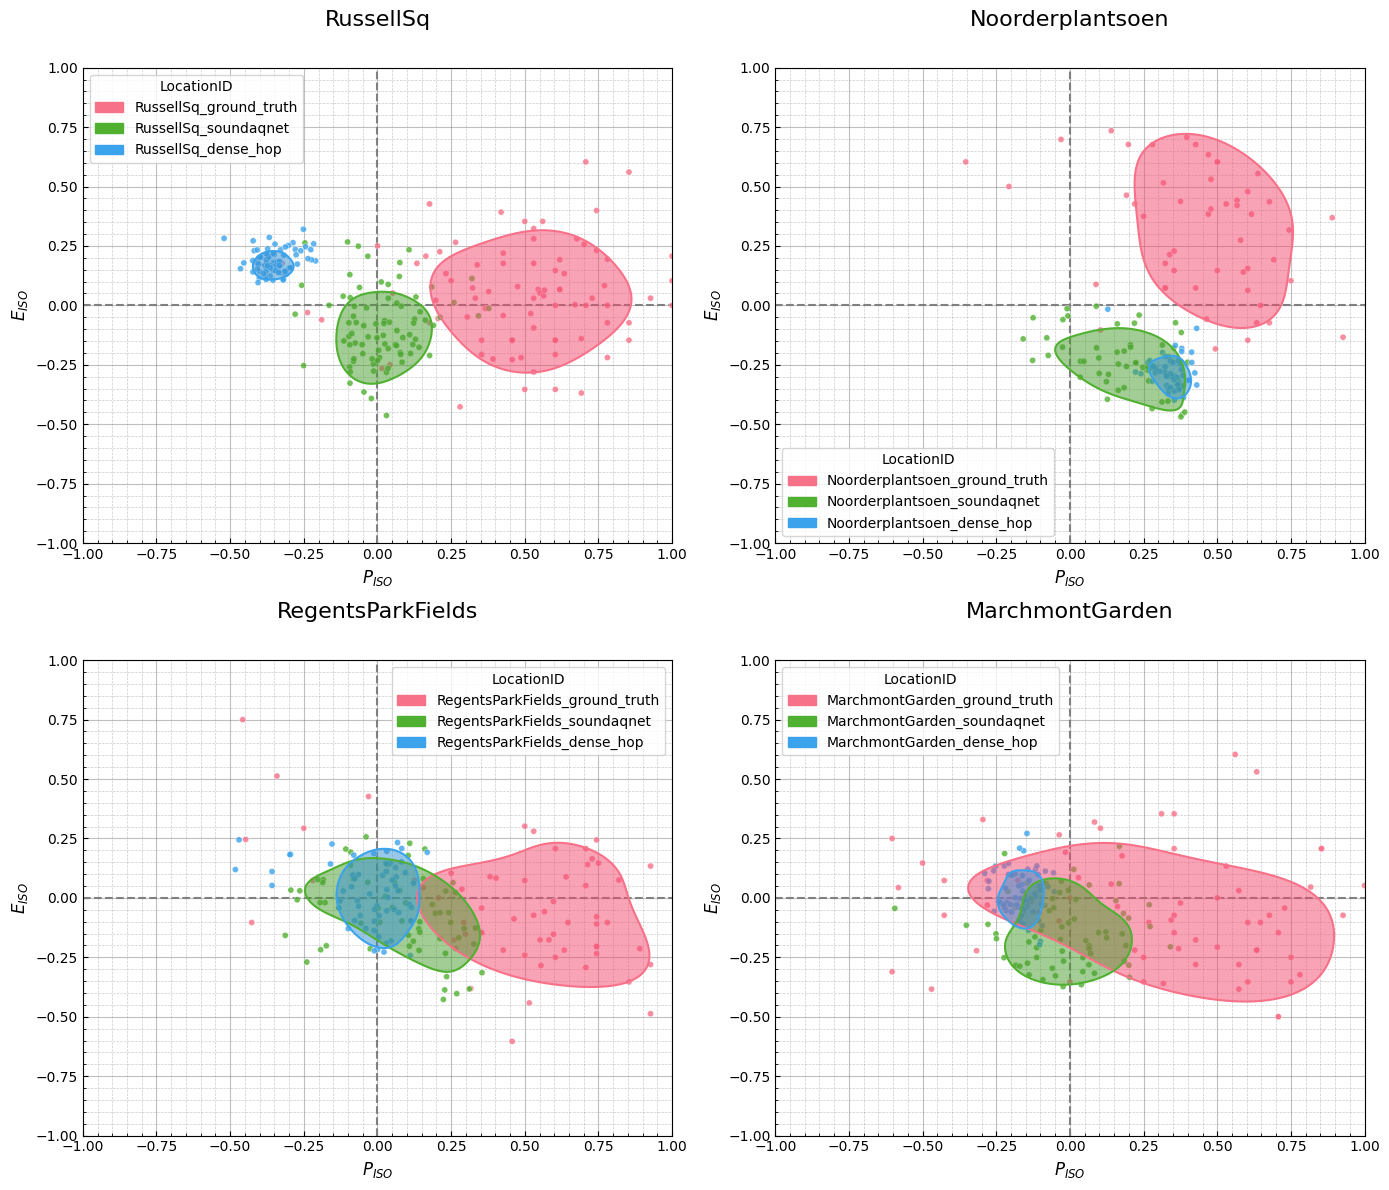

In [ ]:
import soundscapy as sspy
import matplotlib.pyplot as plt

# Define the specific locations to include
selected_locations = ['RussellSq', 'Noorderplantsoen', 'RegentsParkFields', 'MarchmontGarden'] 

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Loop through selected locations
for idx, name in enumerate(selected_locations):
    gt, saqnet, dense_hop = name + '_ground_truth', name + '_soundaqnet', name + '_dense_hop'
    
    sspy.plotting.density(
        sspy.isd.select_location_ids(conc_df, [gt, saqnet, dense_hop]),
        hue="LocationID",
        title=name,
        palette="husl",
        density_type="simple",
        ax=axes[idx],
    )

plt.tight_layout()

plt.savefig("data/output/russelsq_noorderplts_regentsprkflds_marchmontgarden.pdf", format="pdf", bbox_inches="tight")

plt.show()


In [30]:
import soundscapy as sspy
import matplotlib.pyplot as plt
import math

# Locations already included in the main plots
main_locations = ['RussellSq', 'Noorderplantsoen', 'RegentsParkFields', 'MarchmontGarden']

# Remaining locations for appendix
remaining_locations = [name for name in prefix_location_dict.values() if name not in main_locations]
# Remove duplicate entries while preserving order
remaining_locations = list(dict.fromkeys(remaining_locations))

# Settings: 2 plots per row, 3 rows per figure → 6 plots per batch
batch_size = 6
n_batches = math.ceil(len(remaining_locations) / batch_size)

for b in range(n_batches):
    batch_locations = remaining_locations[b * batch_size : (b + 1) * batch_size]
    n = len(batch_locations)

    fig, axes = plt.subplots(3, 2, figsize=(14, 18))  # 3 rows × 2 columns
    axes = axes.flatten()

    for idx, name in enumerate(batch_locations):
        gt, saqnet, dense_hop = name + '_ground_truth', name + '_soundaqnet', name + '_dense_hop'

        sspy.plotting.density(
            sspy.isd.select_location_ids(conc_df, [gt, saqnet, dense_hop]),
            hue="LocationID",
            title=name,
            palette="husl",
            density_type="simple",
            ax=axes[idx],
        )

    # Turn off unused axes
    for j in range(len(batch_locations), len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    fig.savefig(f"appendix_locations_{b}.pdf")
    plt.close(fig)


In [39]:
import soundscapy as sspy
import matplotlib.pyplot as plt

# Define location
name = 'TorringtonSq'
gt, saqnet, dense_hop = name + '_ground_truth', name + '_soundaqnet', name + '_dense_hop'

# Create 1 row × 2 columns layout
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes = axes.flatten()

# Plot TorringtonSq on the first subplot
sspy.plotting.density(
    sspy.isd.select_location_ids(conc_df, [gt, saqnet, dense_hop]),
    hue="LocationID",
    title=name,
    palette="husl",
    density_type="simple",
    ax=axes[0],
)

# Blank the second subplot
axes[1].axis("off")

plt.tight_layout()
fig.savefig("data/output/torringtonsq.pdf")
plt.close(fig)
